In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation

In [2]:
outcomes = make_array('heads', 'tails')
outcomes

array(['heads', 'tails'], dtype='<U5')

In [8]:
np.random.choice(outcomes)

'tails'

In [6]:
np.random.choice(outcomes, 10)
# simulating 10 coin tosses

array(['tails', 'heads', 'tails', 'heads', 'tails', 'tails', 'heads',
       'heads', 'tails', 'tails'], dtype='<U5')

In [9]:
np.random.choice(outcomes, 10) == 'heads'

array([False, False, False, False,  True,  True,  True,  True,  True,
       False])

In [10]:
sum(np.random.choice(outcomes, 10) == 'heads')
# np.random.choice(outcomes, 10) simulating 10 coin tosses
# checking our array for equality with the string 'heads'
# spits out an array of boolean values

# how many heads are there?
# sum(...) since True = 1, what returns after we take the sum
# of our array of boolean values
# taking the sum then answers the question of how many heads
# we got in our 10 tosses

# this means i got 5 heads in my simulating of 10 coin tosses

5

In [11]:
sum(np.random.choice(outcomes, 10) == 'tails')
# new simulation of 10 coin tosses
# 5 tails
# 5 heads

5

In [13]:
flips = np.random.choice(outcomes, 10)
flips

array(['tails', 'tails', 'tails', 'heads', 'heads', 'tails', 'heads',
       'tails', 'heads', 'heads'], dtype='<U5')

In [14]:
sum(flips == 'heads')
# how many heads were in our simulation, called flips?

5

In [15]:
sum(flips == 'tails')


5

In [16]:
def heads_in_100_tosses():
    # sim is a simulation of 100 coin tosses
    sim = np.random.choice(outcomes, 100)
    # find number of heads in sim
    number_heads = sum(sim == 'heads')
    return number_heads
    

In [17]:
# one simulation of 100 tosses
heads_in_100_tosses()
# 45 heads in 100 tosses

45

In [26]:
# another simulation of 100 tosses
heads_in_100_tosses()

44

In [32]:
# initializing an empty array, to collect stuff later
results = make_array()

# let's repeat our simulation of 100 tosses, counting the number of heads each time
# 10,000 times
# how often do we get 50 heads?
for i in np.arange(10000):# array with 10,000 things in it
    # i will "traverse" through our array (0, 1, ...9999)
    # here i is just acting as a counter
    # we will run the code in our for loop, 10,000 times
    results = np.append(results, heads_in_100_tosses())
    #print(results)
results

array([59., 41., 56., ..., 53., 41., 52.])

In [31]:
loop = 0
results = make_array()
for i in np.arange(10):# array with 10 things in it
    loop = loop + 1
    
    results = np.append(results, heads_in_100_tosses())
    print(loop)
    print(results)
    


1
[43.]
2
[43. 51.]
3
[43. 51. 40.]
4
[43. 51. 40. 53.]
5
[43. 51. 40. 53. 58.]
6
[43. 51. 40. 53. 58. 48.]
7
[43. 51. 40. 53. 58. 48. 51.]
8
[43. 51. 40. 53. 58. 48. 51. 43.]
9
[43. 51. 40. 53. 58. 48. 51. 43. 52.]
10
[43. 51. 40. 53. 58. 48. 51. 43. 52. 46.]


In [33]:
heads = Table().with_columns('Heads', results)
heads

Heads
59
41
56
46
48
51
52
54
55
54


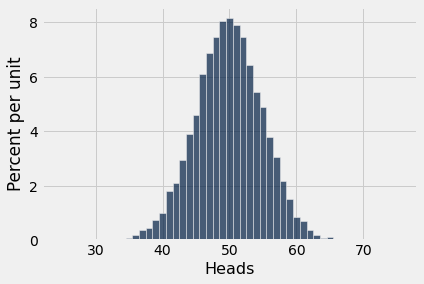

In [34]:
heads.hist('Heads', bins=np.arange(24.5, 76.5))
# empirical distribution
# number of head tosses in 100 tosses
# 10,000 repetitions of simulations
# one simulation = 100 coin tosses

## Monty Hall

In [35]:
doors = make_array('car', 'first goat', 'second goat')
doors

array(['car', 'first goat', 'second goat'], dtype='<U11')

In [43]:
goats = make_array('first goat', 'second goat')

def other_goat(a_goat):
    ''' other_goat returns the other goat after the contestant has chosen a door with a goat behind it
    if the door with the first goat was chosen, the second goat is remaining
    if the door with the second goat was chosen, the first goat is remaining
    '''
    if a_goat == "first goat": # if this is True
        return "second goat" # proceed with line of code 
    # once it returns, we exit out of this function
    # if the above statement is NOT true
    elif a_goat == "second goat":  # if this is True
        return "first goat" # proceed with the line of code
    # once our function returns something, we exit out of the function
    else: # any other scenario
        print('We only accept first goat or second goat. Try again!')



In [39]:
other_goat('first goat')

'second goat'

In [40]:
other_goat('second goat')

'first goat'

In [44]:
other_goat('wheeler hall')
# nothing is returned, or displayed on our screen
# this is the correct behavior
# because we didn't account for this scenario

We only accept first goat or second goat


In [ ]:
# the contestant has three choices:
# first goat
# second goat
# car

# what happens if the contestant chooses the door with the first goat behind it?
# what door does monty_hall open? second goat
# what door remains? car



In [ ]:
# what happens if the contestant chooses the door with the second goat behind it?
# what door does monty_hall open? first goat
# what door remains? car




In [ ]:
# what happens if the contestant chooses the door with the car behind it?
# what door does monty_hall open? first goat or second goat
# what door remains? second goat or first goat
# hint: we'd use the other goat....here to decide




In [46]:
def monty_hall():
    '''monty_hall() randomly selects the contestant's choice for the first door selection
    it populates monty's choice and the remaining door 
    it returns a list of contestant choice, monty choice, and remaining door
    from the possibilities: first goat, second goat, or car
    '''
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = "second goat"
        remaining_door = "car"
    elif contestant_choice == "second goat":
        monty_choice = "first goat"
        remaining_door = "car"
    elif contestant_choice == "car":
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
    
    return [ contestant_choice, monty_choice, remaining_door]

In [47]:
monty_hall()
# here we don't want to swap!

['car', 'second goat', 'first goat']

In [48]:
monty_hall()
# here we want to swap!

['first goat', 'second goat', 'car']

In [52]:
monty_hall()


['car', 'first goat', 'second goat']

In [53]:
games = Table(['Guess', 'Revealed', 'Remaining'])
games

Guess,Revealed,Remaining


In [54]:
games.append(monty_hall())
# appending a row (the results of monty_hall())
# to a table

Guess,Revealed,Remaining
first goat,second goat,car


In [55]:
# let's simulate 3000 repititions of the game above
# calling on monty_hall
# do the following 3000 times
for i in np.arange(3000):
    games.append(monty_hall())
games
# 3000 simulations of the game

Guess,Revealed,Remaining
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
car,second goat,first goat
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car


In [56]:
games.group('Remaining')
# swap!

Remaining,count
car,2000
first goat,496
second goat,505


In [57]:
games.group('Guess')

Guess,count
car,1001
first goat,1027
second goat,973


In [ ]:
#